In [3]:
import os
import cv2
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

            Height        Width
count  1510.000000  1510.000000
mean    568.133113   613.530464
std     478.900608   561.755724
min     105.000000    89.000000
25%     340.000000   300.000000
50%     432.000000   327.000000
75%     675.000000   800.000000
max    5412.000000  5760.000000


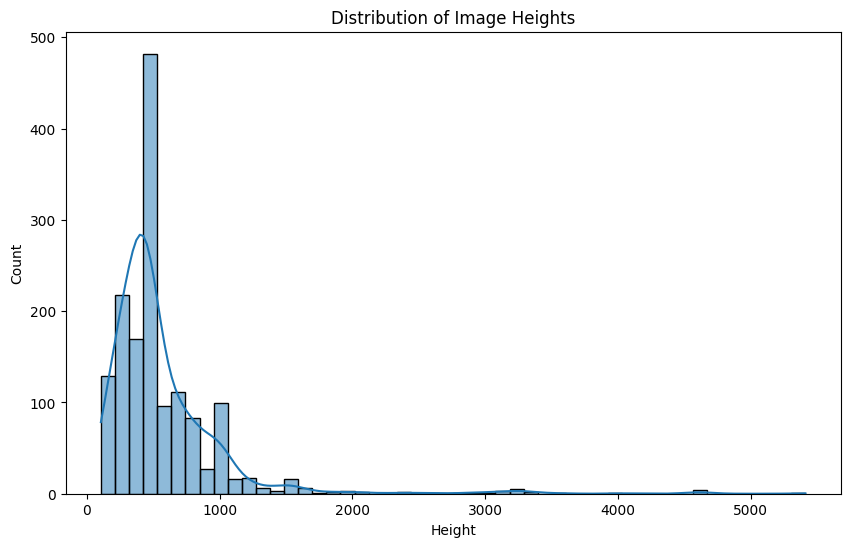

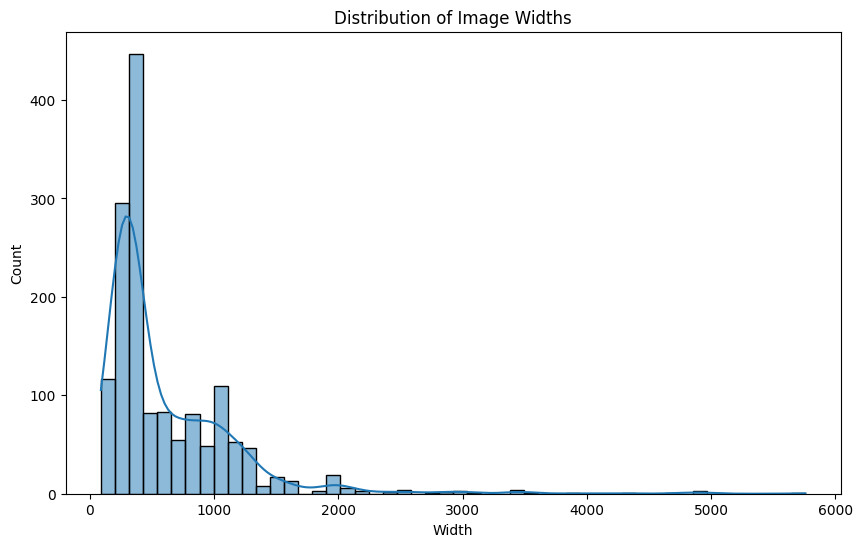

In [2]:
# Function to get image sizes
def get_image_size(image_path):
    image = cv2.imread(image_path)
    return image.shape[0], image.shape[1]

# Path to the directory containing images
data_directory = "./data/obj"

# List to store image sizes
image_sizes = []

# Loop through each image in the directory
for filename in os.listdir(data_directory):
    if filename.endswith(".jpg"):  # Assuming images are in JPEG format
        image_path = os.path.join(data_directory, filename)
        height, width = get_image_size(image_path)
        image_sizes.append((height, width))

# Create a DataFrame from the list of image sizes
df = pd.DataFrame(image_sizes, columns=["Height", "Width"])

# Display basic statistics about image sizes
print(df.describe())

# Plot distribution of image heights
plt.figure(figsize=(10, 6))
sns.histplot(df["Height"], bins=50, kde=True)
plt.title("Distribution of Image Heights")
plt.xlabel("Height")
plt.ylabel("Count")
plt.show()

# Plot distribution of image widths
plt.figure(figsize=(10, 6))
sns.histplot(df["Width"], bins=50, kde=True)
plt.title("Distribution of Image Widths")
plt.xlabel("Width")
plt.ylabel("Count")
plt.show()


                          image_path  \
0     ./data/obj/unmasked (1312).jpg   
1              ./data/obj/prajna.jpg   
2       ./data/obj/413-with-mask.jpg   
3     ./data/obj/unmasked (1645).jpg   
4       ./data/obj/287-with-mask.jpg   
...                              ...   
1505    ./data/obj/masked (1363).jpg   
1506    ./data/obj/182-with-mask.jpg   
1507  ./data/obj/unmasked (1571).jpg   
1508  ./data/obj/unmasked (1324).jpg   
1509    ./data/obj/masked (1435).jpg   

                                                 labels  
0     [{'class': 1, 'bbox': [0.375, 0.57260726072607...  
1     [{'class': 0, 'bbox': [0.36342592592592593, 0....  
2     [{'class': 0, 'bbox': [0.45625, 0.622663551401...  
3     [{'class': 1, 'bbox': [0.4984375, 0.5467289719...  
4     [{'class': 0, 'bbox': [0.5611620795107034, 0.5...  
...                                                 ...  
1505  [{'class': 0, 'bbox': [0.5218729747245625, 0.4...  
1506  [{'class': 0, 'bbox': [0.4921875, 0.5899532710...

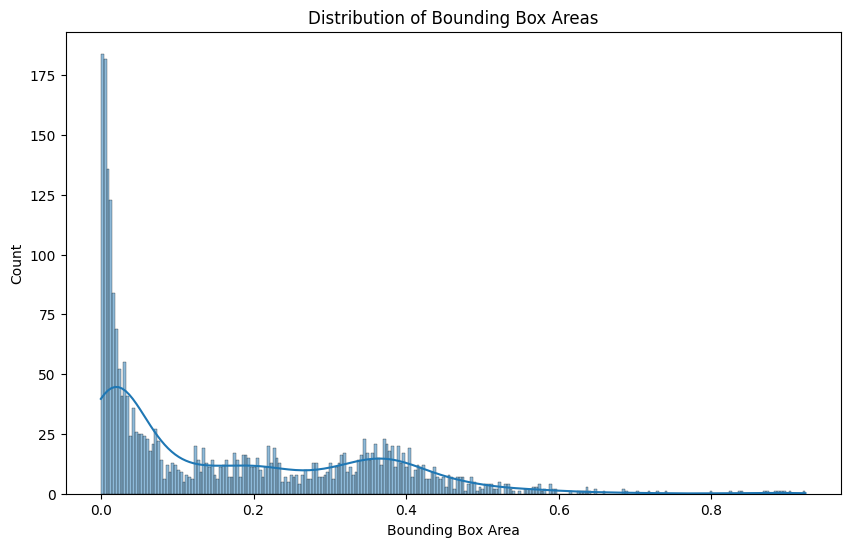

In [10]:
# Function to read label text files
def read_label_file(label_path):
    with open(label_path, "r") as file:
        lines = file.readlines()

    # Parse each line in the label file
    labels = []
    for line in lines:
        values = line.strip().split()
        class_label = int(values[0])
        bbox = [float(val) for val in values[1:]]
        labels.append({"class": class_label, "bbox": bbox})

    return labels

# List to store label information
label_info = []

# Loop through each image in the directory
for filename in os.listdir(data_directory):
    if filename.endswith(".jpg"):  # Assuming images are in JPEG format
        image_path = os.path.join(data_directory, filename)
        label_path = os.path.join(data_directory, filename.replace(".jpg", ".txt"))

        # Read label information from the corresponding text file
        if os.path.exists(label_path):
            labels = read_label_file(label_path)
            label_info.append({"image_path": image_path, "labels": labels})

# Create a DataFrame from the list of label information
label_df = pd.DataFrame(label_info)

# Display label_df
print(label_df)

# Count the number of positive and negative classifications
class_counts = label_df["labels"].apply(lambda x: np.array([label["class"] for label in x])).explode().value_counts()
print("Class Counts:")
print(class_counts)

# Calculate average, max, and min bounding box sizes
label_df["bbox_areas"] = label_df["labels"].apply(lambda x: np.array([label["bbox"][2] * label["bbox"][3] for label in x]))
print("Average Bounding Box Area:", label_df["bbox_areas"].apply(np.mean).mean())
print("Max Bounding Box Area:", label_df["bbox_areas"].apply(np.max).max())
print("Min Bounding Box Area:", label_df["bbox_areas"].apply(np.min).min())

# Plot distribution of bounding box areas
plt.figure(figsize=(10, 6))
sns.histplot(label_df["bbox_areas"].explode(), bins=250, kde=True)
plt.title("Distribution of Bounding Box Areas")
plt.xlabel("Bounding Box Area")
plt.ylabel("Count")
plt.show()
